In [58]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
vgg16_pred = pd.read_csv('./plots/FinalRun_2/predicated_results_vgg16.csv')
resnet50_pred = pd.read_csv('./plots/FinalRun_2/predicated_results_resnet50.csv')
inception_v3_pred = pd.read_csv('./plots/FinalRun_2/predicated_results_inception_v3.csv')
inception_resnet_v2_pred = pd.read_csv('./plots/FinalRun_2/predicated_results_inception_resnet_v2.csv')

In [3]:
del vgg16_pred['Unnamed: 0']
del resnet50_pred['Unnamed: 0']
del inception_v3_pred['Unnamed: 0']
del inception_resnet_v2_pred['Unnamed: 0']

In [4]:
vgg16_pred.rename(columns={'predicated':'predicated_vgg16'}, inplace=True)
resnet50_pred.rename(columns={'predicated':'predicated_resnet50'}, inplace=True)
inception_v3_pred.rename(columns={'predicated':'predicated_inception_v3'}, inplace=True)
inception_resnet_v2_pred.rename(columns={'predicated':'predicated_inception_resnet_v2'}, inplace=True)

In [5]:
vgg16_pred.set_index('original', inplace=True)
resnet50_pred.set_index('original', inplace=True)
inception_v3_pred.set_index('original', inplace=True)
inception_resnet_v2_pred.set_index('original', inplace=True)

In [6]:
concat_pred = pd.concat([vgg16_pred, resnet50_pred, inception_v3_pred, inception_resnet_v2_pred], axis=1)

In [7]:
concat_pred = concat_pred.reset_index()

In [8]:
concat_pred

,original,predicated_vgg16,predicated_resnet50,predicated_inception_v3,predicated_inception_resnet_v2
0,"tf.Tensor([ True False], shape=(2,), dtype=bool)",[1.0000000e+00 3.6393356e-08],[1.0000000e+00 3.0634092e-25],[1. 0.],[1. 0.]
1,"tf.Tensor([False True], shape=(2,), dtype=bool)",[6.296717e-27 1.000000e+00],[0. 1.],[0. 1.],[0. 1.]
2,"tf.Tensor([ True False], shape=(2,), dtype=bool)",[1.00000000e+00 1.09090665e-08],[1. 0.],[1. 0.],[1. 0.]
3,"tf.Tensor([False True], shape=(2,), dtype=bool)",[7.2057834e-30 1.0000000e+00],[0. 1.],[0. 1.],[0. 1.]
4,"tf.Tensor([False True], shape=(2,), dtype=bool)",[2.1048e-23 1.0000e+00],[0. 1.],[0. 1.],[0. 1.]
...,...,...,...,...,...
619,"tf.Tensor([ True False], shape=(2,), dtype=bool)",[3.3785942e-05 9.9996626e-01],[0. 1.],[2.3835367e-19 1.0000000e+00],[0. 1.]
620,"tf.Tensor([ True False], shape=(2,), dtype=bool)",[1.108756e-12 1.000000e+00],[0. 1.],[1.5382333e-28 1.0000000e+00],[1.0000000e+00 7.3820593e-25]
621,"tf.Tensor([False True], shape=(2,), dtype=bool)",[2.3954637e-23 1.0000000e+00],[0. 1.],[0. 1.],[0. 1.]
622,"tf.Tensor([ True False], shape=(2,), dtype=bool)",[0.894988 0.10501199],[0. 1.],[1. 0.],[1. 0.]


In [9]:
for ind, val in enumerate(concat_pred.original):
    val = re.findall("\[.*?\]", val)
    val[0] = val[0].replace("[", "")
    val[0] = val[0].replace("]", "").split(" ")
    fVal = []
    for i in val[0]:
        if i == 'True':
            fVal.append(1.0)
        elif i == 'False':
            fVal.append(0.0)
    concat_pred.original[ind] = np.array(fVal)
    
for ind, val in enumerate(concat_pred.predicated_inception_resnet_v2):
    val = re.findall("\[.*?\]", val)
    val[0] = val[0].replace("[", "")
    val[0] = val[0].replace("]", "").split(" ")
    fVal = []
    for i in val[0]:
        try:
            fVal.append(float(i))
        except:
            pass
    concat_pred.predicated_inception_resnet_v2[ind] = np.array(fVal, dtype=np.float)

for ind, val in enumerate(concat_pred.predicated_inception_v3):
    val = re.findall("\[.*?\]", val)
    val[0] = val[0].replace("[", "")
    val[0] = val[0].replace("]", "").split(" ")
    fVal = []
    for i in val[0]:
        try:
            fVal.append(float(i))
        except:
            pass
    concat_pred.predicated_inception_v3[ind] = np.array(fVal, dtype=np.float)
    
for ind, val in enumerate(concat_pred.predicated_resnet50):
    val = re.findall("\[.*?\]", val)
    val[0] = val[0].replace("[", "")
    val[0] = val[0].replace("]", "").split(" ")
    fVal = []
    for i in val[0]:
        try:
            fVal.append(float(i))
        except:
            pass
    concat_pred.predicated_resnet50[ind] = np.array(fVal, dtype=np.float)
    
for ind, val in enumerate(concat_pred.predicated_vgg16):
    val = re.findall("\[.*?\]", val)
    val[0] = val[0].replace("[", "")
    val[0] = val[0].replace("]", "").split(" ")
    fVal = []
    for i in val[0]:
        try:
            fVal.append(float(i))
        except:
            pass
    concat_pred.predicated_vgg16[ind] = np.array(fVal, dtype=np.float)

In [10]:
concat_pred

,original,predicated_vgg16,predicated_resnet50,predicated_inception_v3,predicated_inception_resnet_v2
0,"[1.0, 0.0]","[1.0, 3.6393356e-08]","[1.0, 3.0634092e-25]","[1.0, 0.0]","[1.0, 0.0]"
1,"[0.0, 1.0]","[6.296717e-27, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
2,"[1.0, 0.0]","[1.0, 1.09090665e-08]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]"
3,"[0.0, 1.0]","[7.2057834e-30, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
4,"[0.0, 1.0]","[2.1048e-23, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
...,...,...,...,...,...
619,"[1.0, 0.0]","[3.3785942e-05, 0.99996626]","[0.0, 1.0]","[2.3835367e-19, 1.0]","[0.0, 1.0]"
620,"[1.0, 0.0]","[1.108756e-12, 1.0]","[0.0, 1.0]","[1.5382333e-28, 1.0]","[1.0, 7.3820593e-25]"
621,"[0.0, 1.0]","[2.3954637e-23, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
622,"[1.0, 0.0]","[0.894988, 0.10501199]","[0.0, 1.0]","[1.0, 0.0]","[1.0, 0.0]"


In [11]:
ori_list = np.argmax(list(concat_pred.original), axis=-1)
vgg16_list = np.argmax(list(concat_pred.predicated_vgg16), axis=-1)
resnet50_list = np.argmax(list(concat_pred.predicated_resnet50), axis=-1)
inception_v3_list = np.argmax(list(concat_pred.predicated_inception_v3), axis=-1)
inception_resnet_v2_list = np.argmax(list(concat_pred.predicated_inception_resnet_v2), axis=-1)

print(ori_list.shape)
print(vgg16_list.shape)
print(resnet50_list.shape)
print(inception_v3_list.shape)
print(inception_resnet_v2_list.shape)

(624,)
(624,)
(624,)
(624,)
(624,)


In [13]:
new_df = pd.DataFrame(zip(ori_list, vgg16_list, resnet50_list, 
                          inception_v3_list, inception_resnet_v2_list), columns=['original', 
                                                                                 'pre_vgg16','pre_resnet50',
                                                                                 'pre_inception_v3',
                                                                                 'pre_inception_resnet_v2'])
new_df

,original,pre_vgg16,pre_resnet50,pre_inception_v3,pre_inception_resnet_v2
0,0,0,0,0,0
1,1,1,1,1,1
2,0,0,0,0,0
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
619,0,1,1,1,1
620,0,1,1,1,0
621,1,1,1,1,1
622,0,0,1,0,0


In [18]:
new_df
    

,original,pre_vgg16,pre_resnet50,pre_inception_v3,pre_inception_resnet_v2
0,0,0,0,0,0
1,1,1,1,1,1
2,0,0,0,0,0
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
619,0,1,1,1,1
620,0,1,1,1,0
621,1,1,1,1,1
622,0,0,1,0,0


In [28]:
pre_new_df = new_df[['pre_vgg16', 'pre_resnet50', 'pre_inception_v3', 'pre_inception_resnet_v2']]

In [35]:
count_df = pre_new_df.apply(pd.Series.value_counts, axis=1).fillna(0.0)
count_df

,0,1
0,4.0,0.0
1,0.0,4.0
2,4.0,0.0
3,0.0,4.0
4,0.0,4.0
...,...,...
619,0.0,4.0
620,1.0,3.0
621,0.0,4.0
622,3.0,1.0


In [38]:
count_df.columns

Int64Index([0, 1], dtype='int64')

In [39]:
count_df = count_df.rename(columns={0:"Normal", 1:"Pnuemonia"})


In [40]:
count_df

,Normal,Pnuemonia
0,4.0,0.0
1,0.0,4.0
2,4.0,0.0
3,0.0,4.0
4,0.0,4.0
...,...,...
619,0.0,4.0
620,1.0,3.0
621,0.0,4.0
622,3.0,1.0


In [61]:
for i in range(len(new_df)):
    if new_df['original'][i] == 0:
        if count_df.Normal[i] > 1:
            new_df['Final_pre'][i] = 0.
        else:
            new_df['Final_pre'][i] = 1.
    
    elif new_df.original[i] == 1:
        if count_df.Pnuemonia[i] > 1:
            new_df['Final_pre'][i] = 1.
        else:
            new_df['Final_pre'][i] = 0.

/data/user/tr27p/.conda/envs/cs765/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/data/user/tr27p/.conda/envs/cs765/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/data/user/tr27p/.conda/envs/cs765/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [62]:
new_df

,original,pre_vgg16,pre_resnet50,pre_inception_v3,pre_inception_resnet_v2,Final_pre
0,0,0,0,0,0,0.0
1,1,1,1,1,1,1.0
2,0,0,0,0,0,0.0
3,1,1,1,1,1,1.0
4,1,1,1,1,1,1.0
...,...,...,...,...,...,...
619,0,1,1,1,1,1.0
620,0,1,1,1,0,1.0
621,1,1,1,1,1,1.0
622,0,0,1,0,0,0.0


<Figure size 432x288 with 0 Axes>

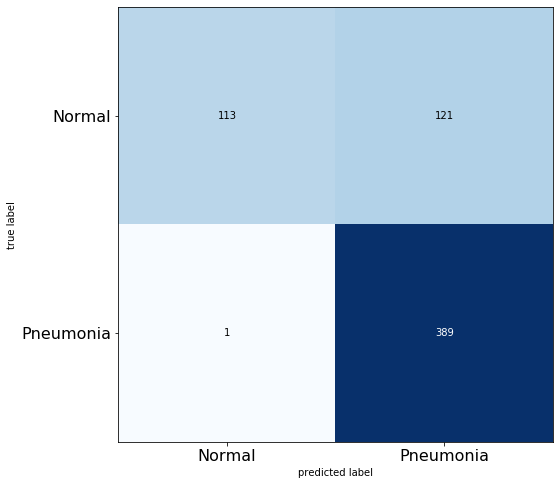

#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#-- 

Recall of the model is 1.00
Precision of the model is 0.76
F1-score: 0.8644444444444443


In [69]:
# Get the confusion matrix
cm  = confusion_matrix(list(new_df.original), list(new_df.Final_pre))
fig = plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
#plt.savefig("/data/user/tr27p/Courses/CS765-DeepLearning/FinalProject/Chest_X-Ray_Images_Pneumonia/Python/python_confusion-mat.png", format='png')
plt.savefig('./plots/FinalRun_2/confusion-mat/python_confusion-mat-_mix.png', format='png')
plt.show()
plt.close()

# In[ ]:


# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("#--#--"*10,"\n\nRecall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1-score: {}".format(2*precision*recall/(precision+recall)))

<Figure size 432x288 with 0 Axes>

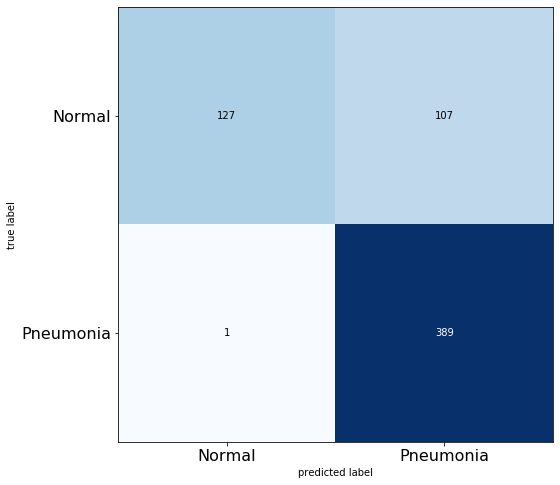

#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#-- 

Recall of the model is 1.00
Precision of the model is 0.78
F1-score: 0.8781038374717833


In [64]:
# Get the confusion matrix
cm  = confusion_matrix(list(new_df.original), list(new_df.pre_inception_v3))
fig = plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
#plt.savefig("/data/user/tr27p/Courses/CS765-DeepLearning/FinalProject/Chest_X-Ray_Images_Pneumonia/Python/python_confusion-mat.png", format='png')
# plt.savefig('/data/user/tr27p/Courses/CS765-DeepLearning/FinalProject/Chest_X-Ray_Images_Pneumonia/Python/plots/FinalRun_2/confusion-mat/python_confusion-mat-'+FileTime+'_reLoad_TEST-2.png', format='png')
plt.show()
plt.close()

# In[ ]:


# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("#--#--"*10,"\n\nRecall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1-score: {}".format(2*precision*recall/(precision+recall)))

<Figure size 432x288 with 0 Axes>

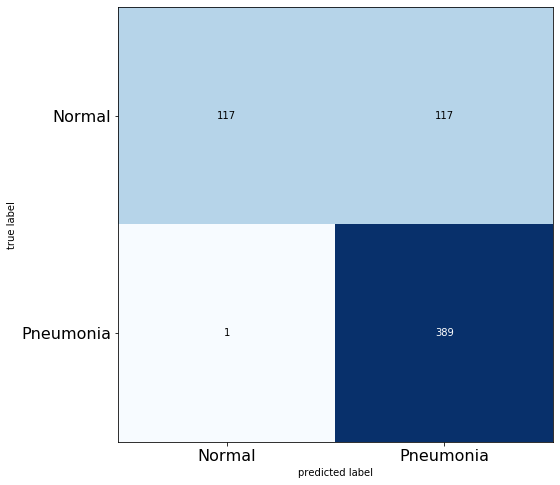

#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#-- 

Recall of the model is 1.00
Precision of the model is 0.77
F1-score: 0.8683035714285714


In [65]:
# Get the confusion matrix
cm  = confusion_matrix(list(new_df.original), list(new_df.pre_inception_resnet_v2))
fig = plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
#plt.savefig("/data/user/tr27p/Courses/CS765-DeepLearning/FinalProject/Chest_X-Ray_Images_Pneumonia/Python/python_confusion-mat.png", format='png')
# plt.savefig('/data/user/tr27p/Courses/CS765-DeepLearning/FinalProject/Chest_X-Ray_Images_Pneumonia/Python/plots/FinalRun_2/confusion-mat/python_confusion-mat-'+FileTime+'_reLoad_TEST-2.png', format='png')
plt.show()
plt.close()

# In[ ]:


# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("#--#--"*10,"\n\nRecall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1-score: {}".format(2*precision*recall/(precision+recall)))

<Figure size 432x288 with 0 Axes>

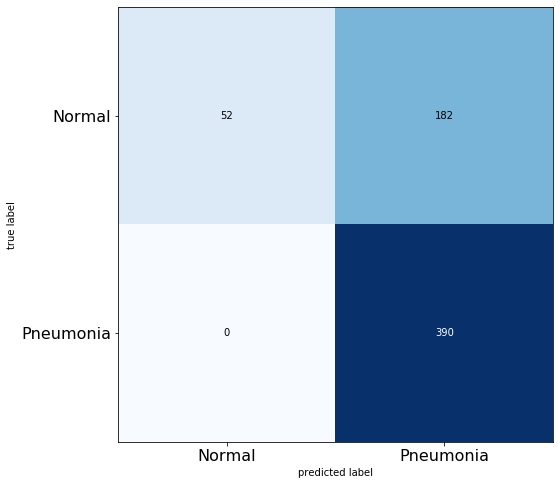

#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#-- 

Recall of the model is 1.00
Precision of the model is 0.68
F1-score: 0.8108108108108109


In [66]:
# Get the confusion matrix
cm  = confusion_matrix(list(new_df.original), list(new_df.pre_resnet50))
fig = plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
#plt.savefig("/data/user/tr27p/Courses/CS765-DeepLearning/FinalProject/Chest_X-Ray_Images_Pneumonia/Python/python_confusion-mat.png", format='png')
# plt.savefig('/data/user/tr27p/Courses/CS765-DeepLearning/FinalProject/Chest_X-Ray_Images_Pneumonia/Python/plots/FinalRun_2/confusion-mat/python_confusion-mat-'+FileTime+'_reLoad_TEST-2.png', format='png')
plt.show()
plt.close()

# In[ ]:


# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("#--#--"*10,"\n\nRecall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1-score: {}".format(2*precision*recall/(precision+recall)))

<Figure size 432x288 with 0 Axes>

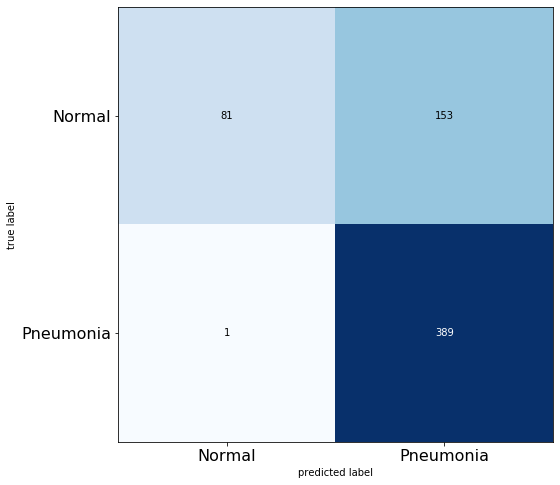

#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#--#-- 

Recall of the model is 1.00
Precision of the model is 0.72
F1-score: 0.8347639484978542


In [67]:
# Get the confusion matrix
cm  = confusion_matrix(list(new_df.original), list(new_df.pre_vgg16))
fig = plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
#plt.savefig("/data/user/tr27p/Courses/CS765-DeepLearning/FinalProject/Chest_X-Ray_Images_Pneumonia/Python/python_confusion-mat.png", format='png')
# plt.savefig('/data/user/tr27p/Courses/CS765-DeepLearning/FinalProject/Chest_X-Ray_Images_Pneumonia/Python/plots/FinalRun_2/confusion-mat/python_confusion-mat-'+FileTime+'_reLoad_TEST-2.png', format='png')
plt.show()
plt.close()

# In[ ]:


# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("#--#--"*10,"\n\nRecall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))
print("F1-score: {}".format(2*precision*recall/(precision+recall)))